# **Final Portfolio - Regression**





The dataset is titled as "Agricultural Crop Yield in Indian States Dataset". The dataset is maintained by the FAO of the United Nations. It shows free access to food and agriculture statistics for over 245 countries. It consists of 10 columns with 19,689 records. The columns are as follows:
1. Crop
2. Crop_Year
3. Season
4. State
5. Area
6. Production
7. Annual_Rainfall
8. Fertilizer
9. Pesticide
10. Yield

This dataset is useful for regression-based analysis to understand how different factors like rainfall, fertilizer, and pesticide use impact crop yield across various states and years. It serves as a valuable resource for understanding global agricultural trends and informing policies aimed at achieving zero hunger.




In [ ]:
import pandas as pdn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Final Portfolio/Agricultural Crop Yield in Indian States Dataset- regression.csv")


In [ ]:
# Display basic information
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None
          Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   


In [ ]:
# Check for missing values
print(df.isnull().sum())


Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [ ]:
# Handle missing values only for numeric columns
for col in df.select_dtypes(include=np.number).columns:
    # Fill missing values with column mean using fillna
    df[col] = df[col].fillna(df[col].mean())


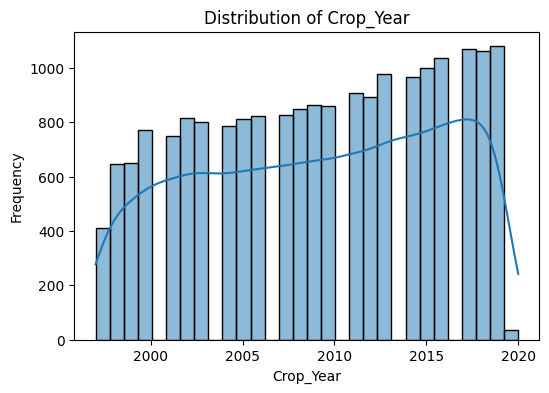

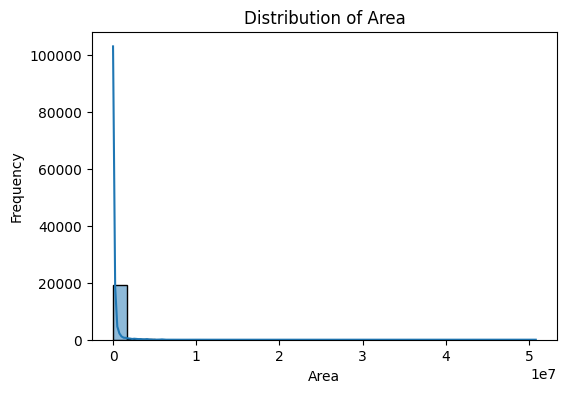

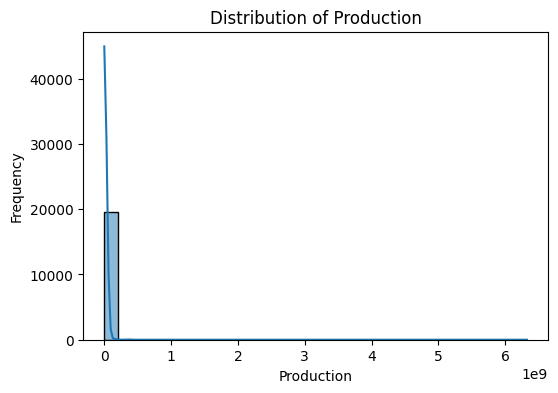

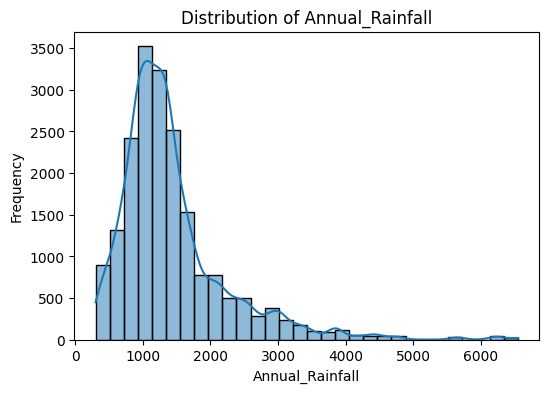

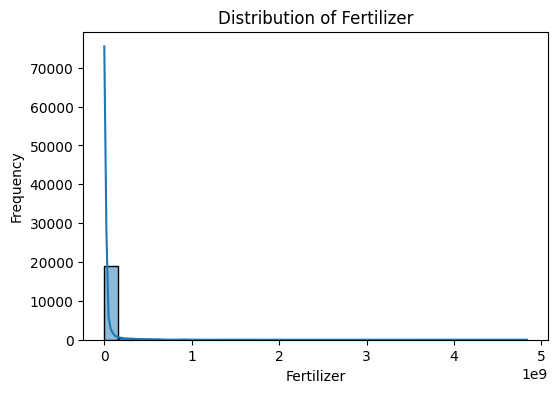

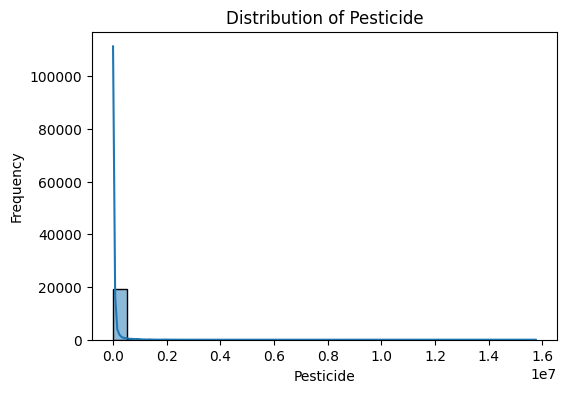

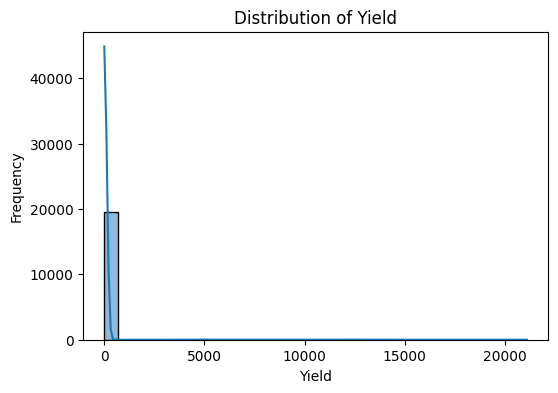

In [2]:
# Exploratory Data Analysis (EDA)
# Distribution Plots
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)  # Disable KDE
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


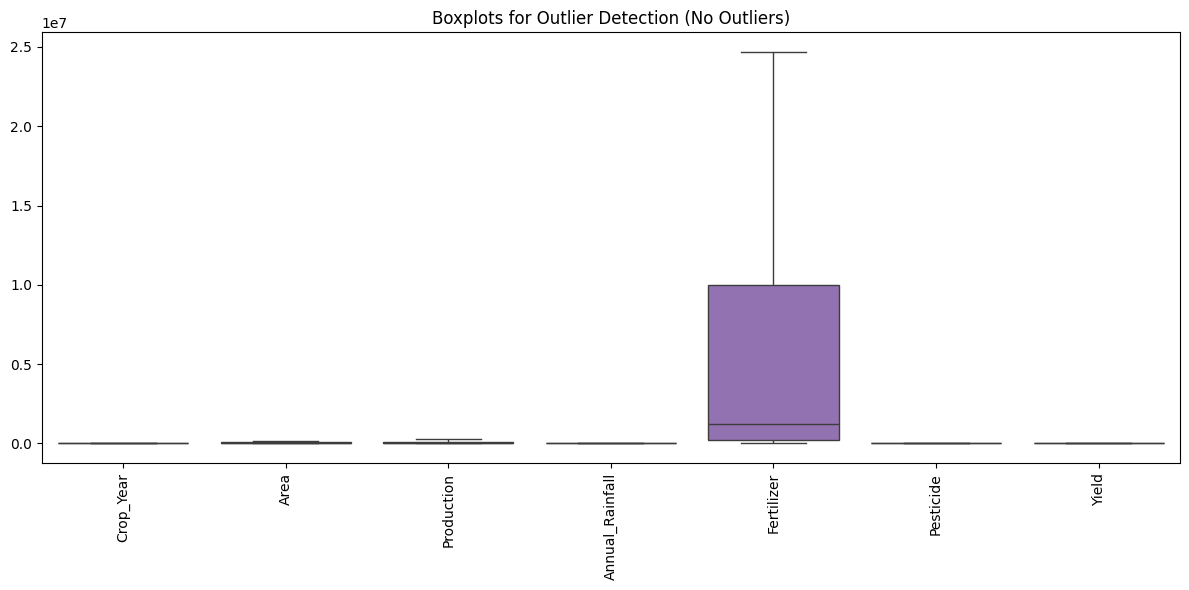

In [ ]:
#Boxplot for Outliers detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], showfliers=False)  # Suppress outliers
plt.xticks(rotation=90)
plt.title("Boxplots for Outlier Detection (No Outliers)")
plt.tight_layout()
plt.show()


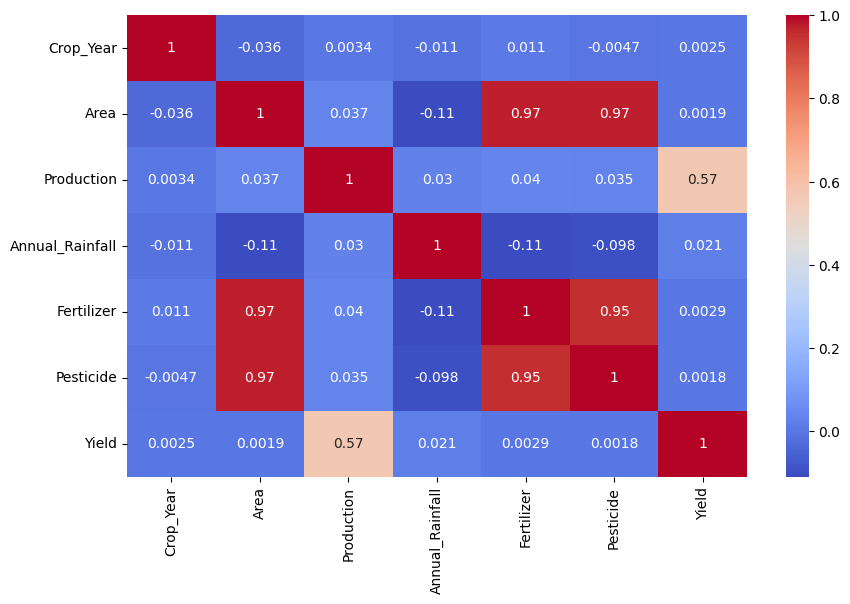

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [ ]:
# Handling missing values
df.dropna(inplace=True)


In [ ]:
# Concatenate the encoded features with the numerical features
X_encoded = pd.concat([X.select_dtypes(exclude=['object']), encoded_df], axis=1)


In [ ]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#Linear Regression from Scratch
class LinearRegressionScratch:
    def __init__(self): # Added an __init__ method
        # Initialize any necessary attributes here, for example:
        self.coefficients = None


In [ ]:
# Model 1: Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
print("Model 1 - Linear Regression MSE:", mse1)


Model 1 - Linear Regression MSE: 4.711691395243685e+16


In [ ]:
# Model 2: Random Forest Regressor
# Import the RandomForestRegressor class from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
print("Model 2 - Random Forest Regressor MSE:", mse2)


Model 2 - Random Forest Regressor MSE: 566375869940780.6


In [ ]:
# Evaluate Models
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f"Model 1 - Linear Regression: MSE={mse1}, R2={r2_1}")
print(f"Model 2 - Ridge Regression: MSE={mse2}, R2={r2_2}")


Model 1 - Linear Regression: MSE=4.4831916455823e+16, R2=0.4102951167646076
Model 2 - Ridge Regression: MSE=566375869940780.6, R2=0.9925500705155024


In [ ]:
#Hyperparameter Optimization
# Cross-validation
cv_scores1 = cross_val_score(model1, X, y, cv=5, scoring='r2')
cv_scores2 = cross_val_score(model2, X, y, cv=5, scoring='r2')

print(f"Cross-Validation Scores for Model 1: {cv_scores1.mean()}")
print(f"Cross-Validation Scores for Model 2: {cv_scores2.mean()}")


Cross-Validation Scores for Model 1: -20.532583383192815
Cross-Validation Scores for Model 2: 0.9767320390127923


In [ ]:
# Feature Selection
# Import necessary classes
from sklearn.feature_selection import SelectKBest, f_regression
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit the encoder on the categorical columns and transform them
categorical_cols = X.select_dtypes(include=['object']).columns
encoded_data = encoder.fit_transform(X[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns and concatenate the encoded columns
X_encoded = X.drop(categorical_cols, axis=1)
X_encoded = pd.concat([X_encoded, encoded_df], axis=1)

# Now apply SelectKBest on the encoded data
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X_encoded, y)
selected_features_indices = selector.get_support(indices=True) # Get indices of selected features
selected_features = X_encoded.columns[selected_features_indices] # Get names of selected features
print("Selected Features:", selected_features)

Selected Features: Index(['Yield', 'Crop_Coconut ', 'Season_Whole Year ', 'State_Kerala',
       'State_Tamil Nadu'],
      dtype='object')


In [ ]:
# Final Model: Best performing regression model with selected features
X_train_new, X_test_new = train_test_split(X_new, test_size=0.2, random_state=42)
final_model = Ridge(alpha=1.0)  # Change to the best model found
final_model.fit(X_train_new, y_train)
y_final_pred = final_model.predict(X_test_new)

final_mse = mean_squared_error(y_test, y_final_pred)
final_r2 = r2_score(y_test, y_final_pred)
print(f"Final Model Performance: MSE={final_mse}, R2={final_r2}")


Final Model Performance: MSE=4.7425702536613304e+16, R2=0.3761772730757871
